Tentukan Library yang digunakan

In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for MODEL
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

Load Dataset

In [94]:
data = pd.read_csv('/content/sample_data/data 1.csv')

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [96]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [97]:
BreastCancer_dataset.shape

(569, 33)

In [98]:
#Melabeli data yang ada di variabel kategorik menjadi numerik
data[['diagnosis']] = data[['diagnosis']].apply(LabelEncoder().fit_transform)

#view udpated DataFr
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [99]:
data['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [100]:
#Memisahkan data dan label
X = data.drop(columns='diagnosis', axis=1)
Y = data['diagnosis']

In [101]:
print(X)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

In [102]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


Visualisasi Data

In [103]:
data['diagnosis'].unique()

array([1, 0])

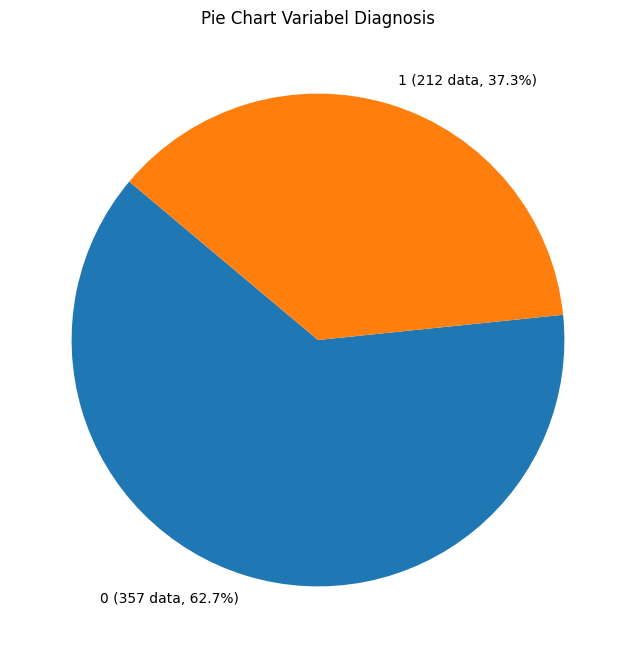

In [104]:
import matplotlib.pyplot as plt
# Menghitung jumlah data untuk setiap kategori pada variabel kategorik
kategori_counts = data['diagnosis'].value_counts()

# Plotting pie chart dengan jumlah data dan persentase
plt.figure(figsize=(8, 8))
plt.pie(kategori_counts, labels=[f'{label} ({count} data, {count / sum(kategori_counts) * 100:.1f}%)' for label, count in zip(kategori_counts.index, kategori_counts)], autopct='', startangle=140)
plt.title('Pie Chart Variabel Diagnosis')
plt.show()

In [105]:
X=data.drop(columns=["diagnosis", "radius_se","texture_se","perimeter_se","area_se","smoothness_se",
                     "compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se",
                     "radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst",
                     "compactness_worst","concavity_worst","concave points_worst","symmetry_worst",
                     "fractal_dimension_worst"])
Y=data["diagnosis"]

In [106]:
X.shape

(569, 12)

In [107]:
Y.shape

(569,)

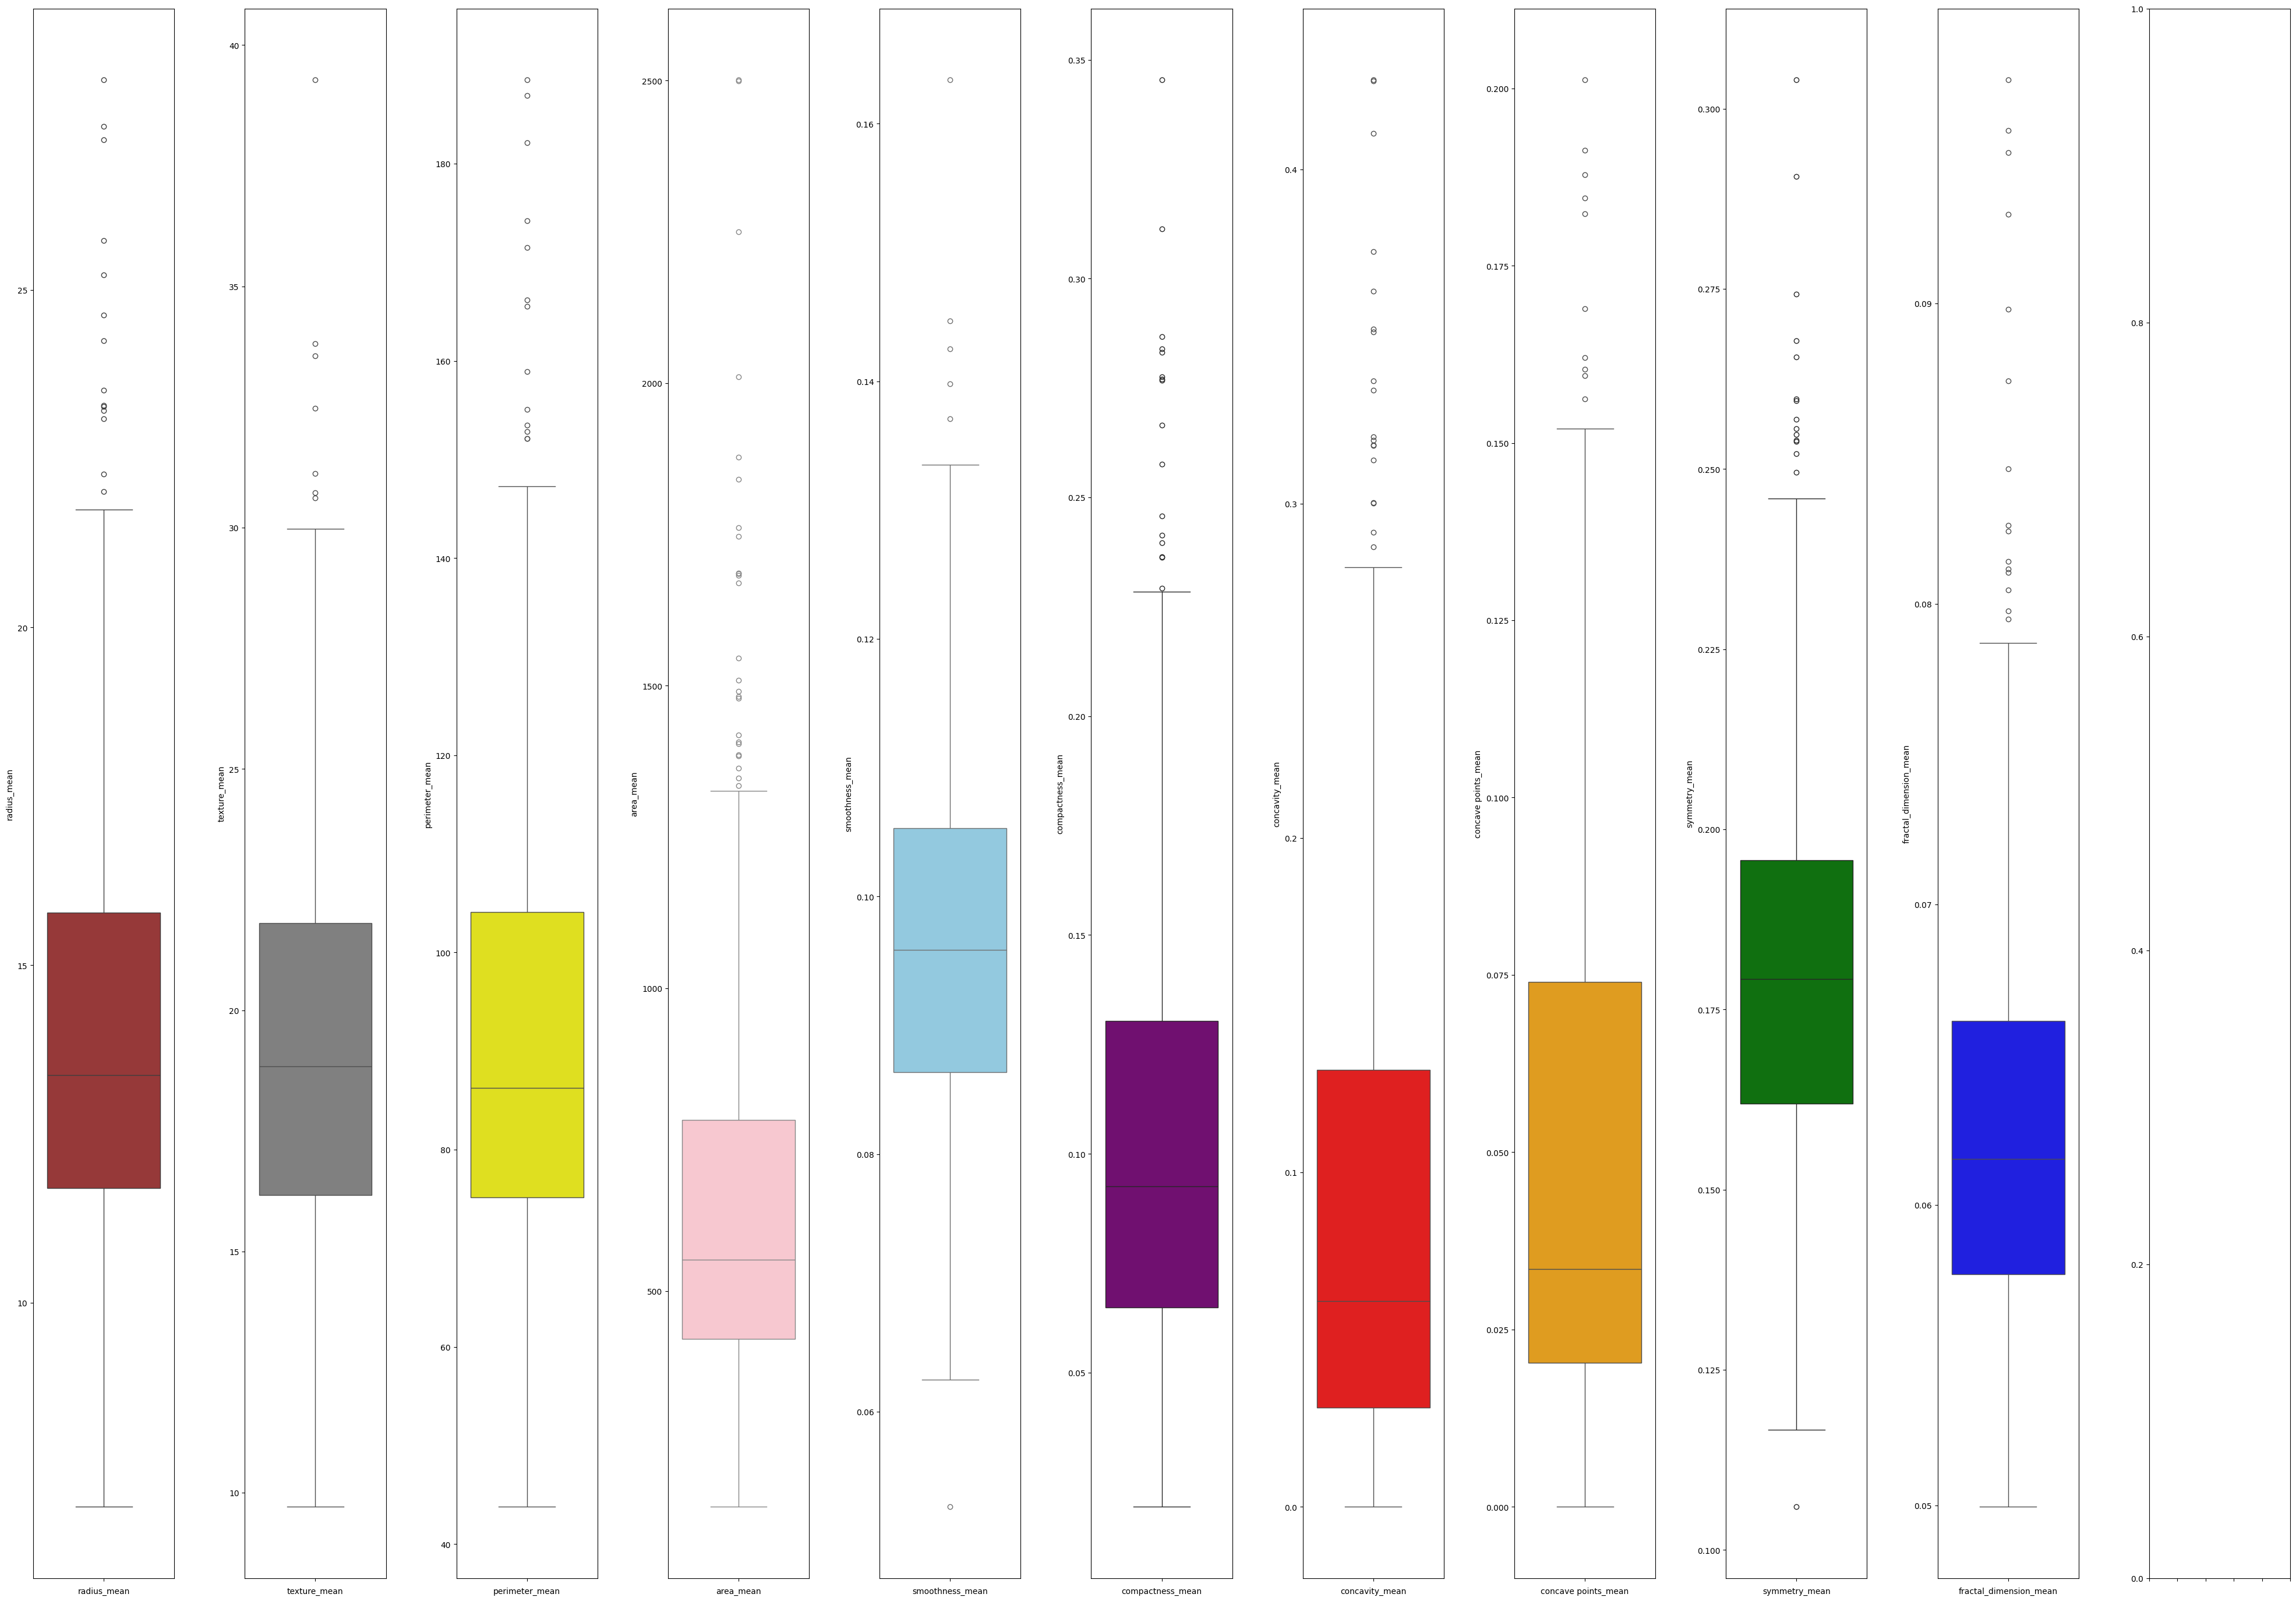

In [108]:
# initialize figure with 11 subplots in a row
fig, ax = plt.subplots(1, 11, figsize=(50, 35))

# add padding between the subplots
plt.subplots_adjust(wspace=0.5)

# draw boxplot for age in the 1st subplot
sns.boxplot(data=data['radius_mean'], ax=ax[0], color='brown',)
ax[0].set_xlabel('radius_mean')

# draw boxplot for station_distance in the 2nd subplot
sns.boxplot(data=data['texture_mean'], ax=ax[1], color='grey')
ax[1].set_xlabel('texture_mean')

# draw boxplot for stores_count in the 3rd subplot
sns.boxplot(data=data['perimeter_mean'], ax=ax[2], color='yellow')
ax[2].set_xlabel('perimeter_mean')

sns.boxplot(data=data['area_mean'], ax=ax[3], color='pink')
ax[3].set_xlabel('area_mean')

sns.boxplot(data=data['smoothness_mean'], ax=ax[4], color='skyblue')
ax[4].set_xlabel('smoothness_mean')

sns.boxplot(data=data['compactness_mean'], ax=ax[5], color='purple')
ax[5].set_xlabel('compactness_mean')

sns.boxplot(data=data['concavity_mean'], ax=ax[6], color='red')
ax[6].set_xlabel('concavity_mean')

sns.boxplot(data=data['concave points_mean'], ax=ax[7], color='orange')
ax[7].set_xlabel('concave points_mean')

sns.boxplot(data=data['symmetry_mean'], ax=ax[8], color='green')
ax[8].set_xlabel('symmetry_mean')

sns.boxplot(data=data['fractal_dimension_mean'], ax=ax[9], color='blue')
ax[9].set_xlabel('fractal_dimension_mean')

# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])


plt.show()

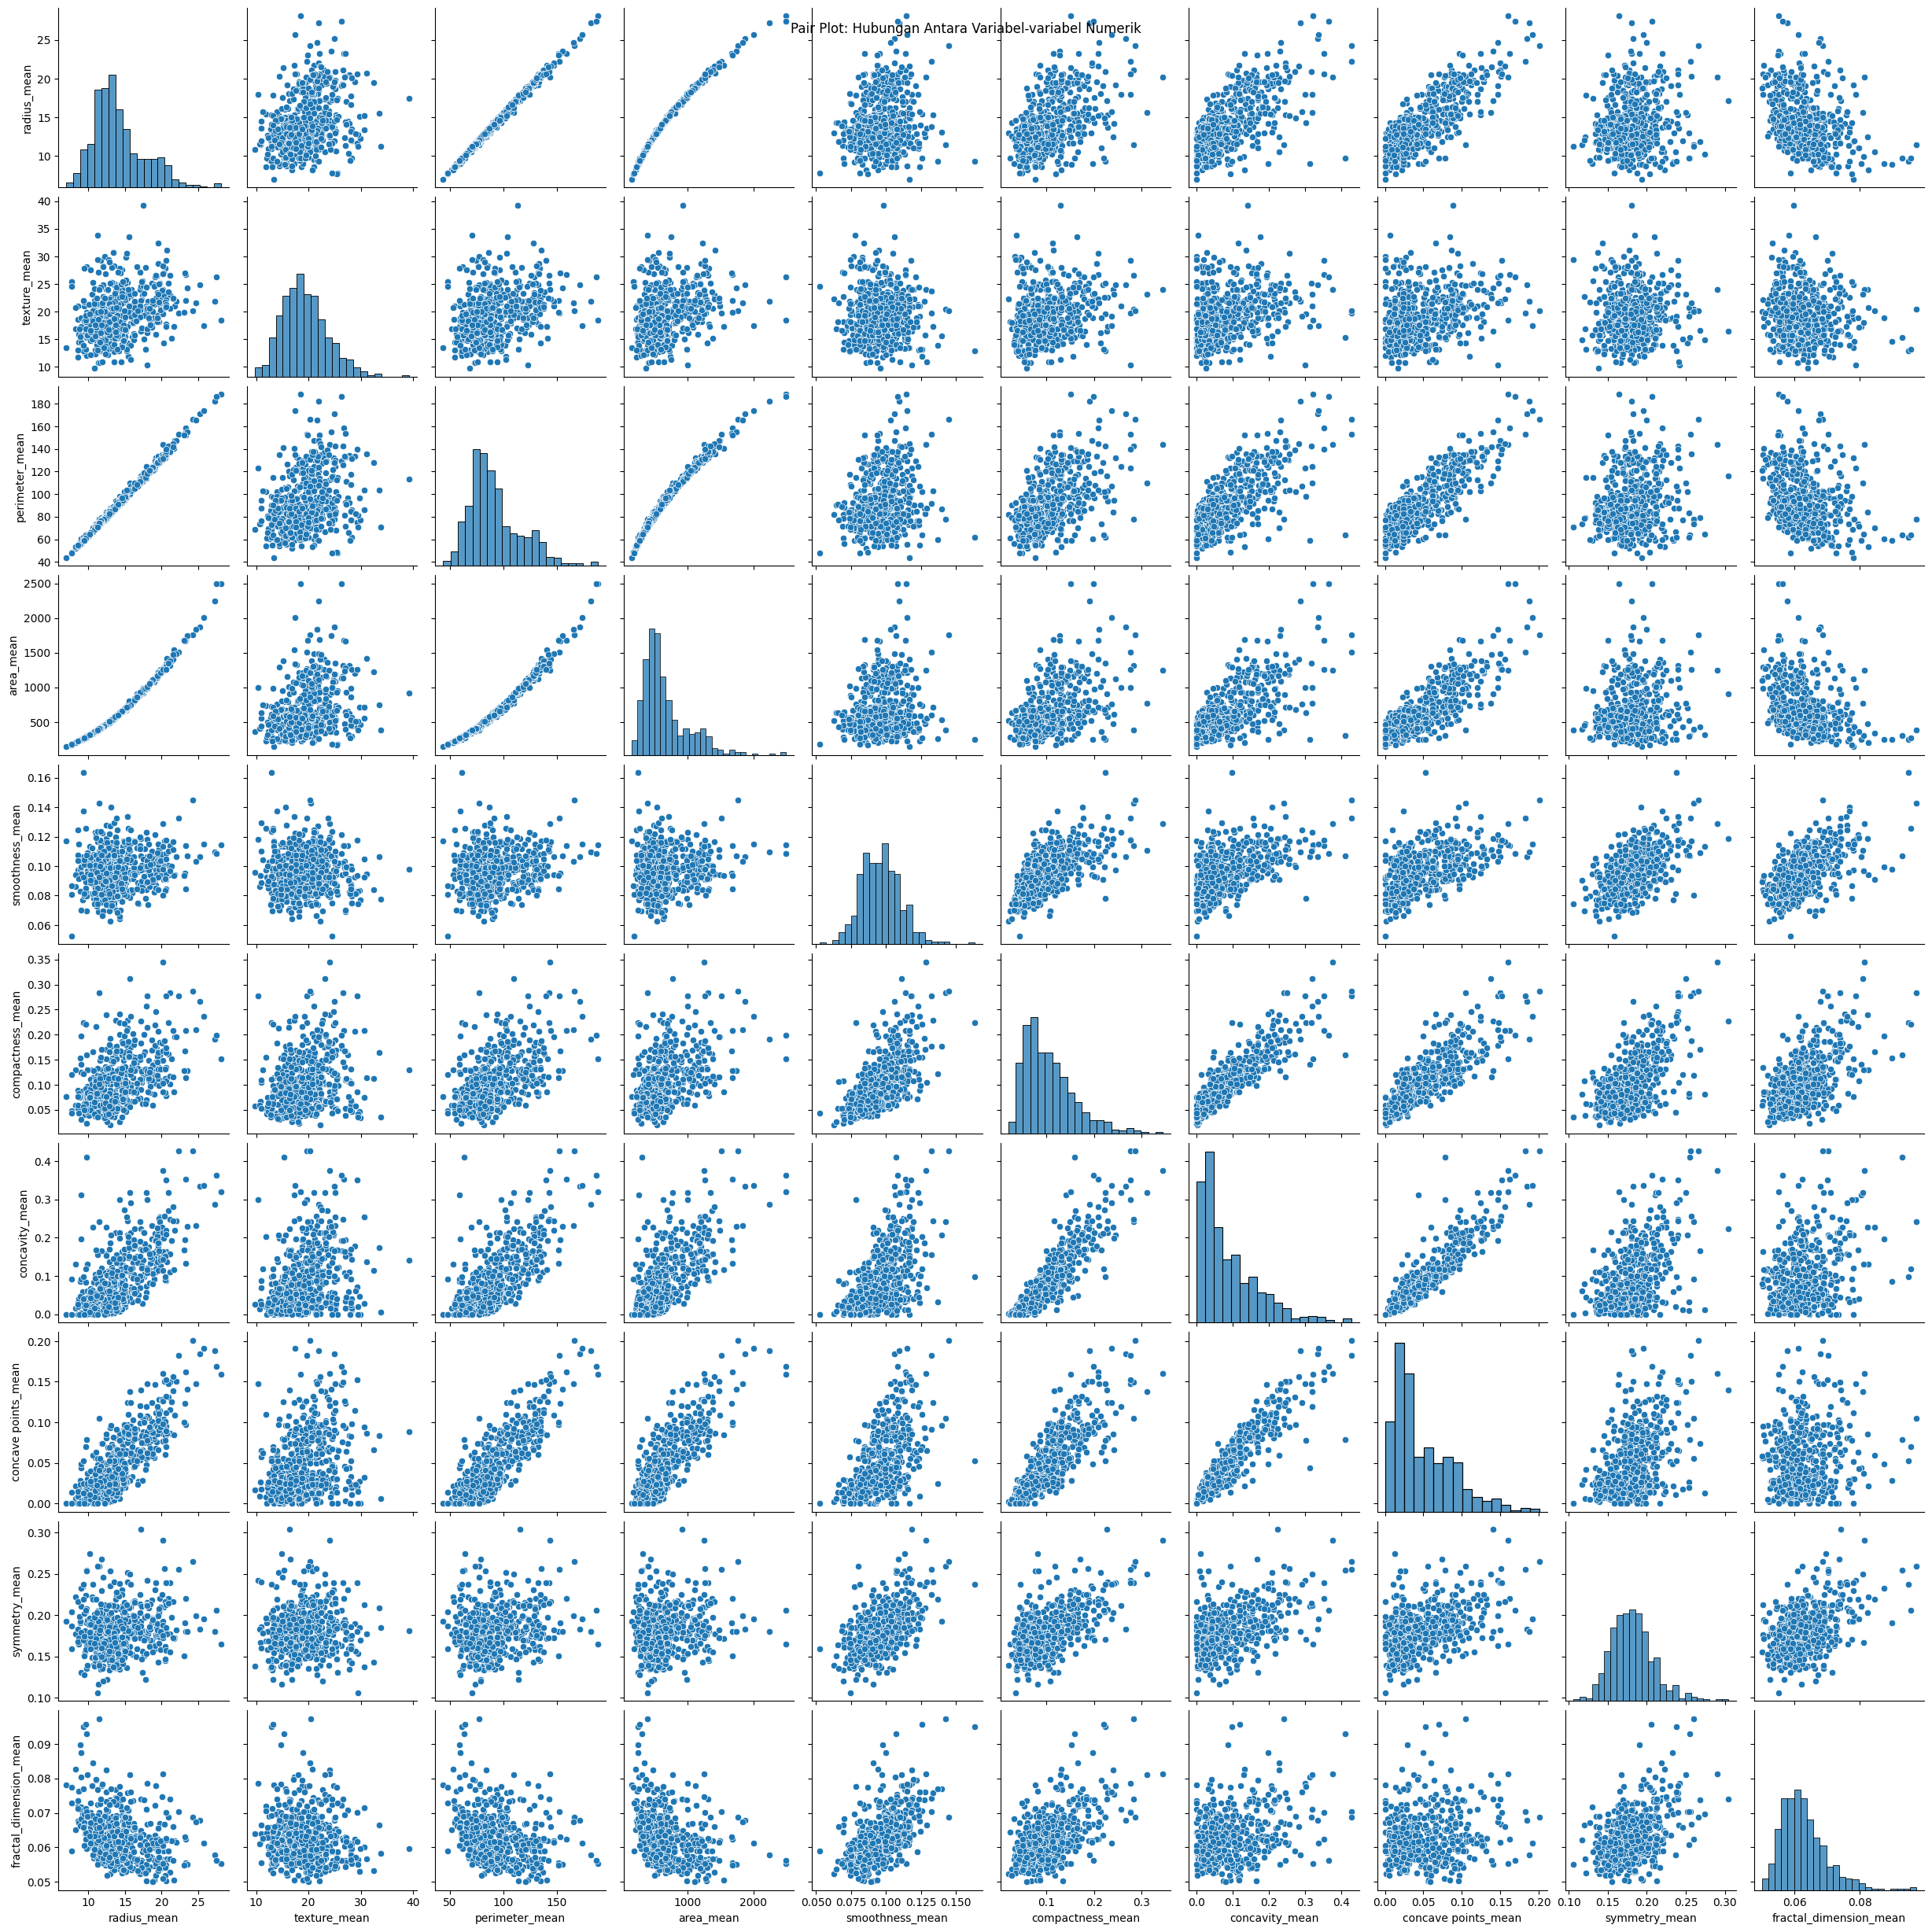

In [109]:
# Memilih kolom-kolom yang ingin dilihat hubungannya
selected_columns = ['radius_mean','texture_mean','perimeter_mean','area_mean',
                    'smoothness_mean','compactness_mean','concavity_mean','concave points_mean',
                    'symmetry_mean','fractal_dimension_mean']

selected_data = data[selected_columns]

# Membuat pair plot untuk melihat hubungan antar variabel
sns.pairplot(selected_data)
plt.suptitle('Pair Plot: Hubungan Antara Variabel-variabel Numerik')
plt.show()

Cek Missing Value

In [110]:
#Cek missing value
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Transpose data

In [111]:
identify = pd.DataFrame({
    'Data Kosong': data.isnull().sum(),
    'Data Duplikat': data.duplicated().sum(),
    'Data NaNN': data.isna().sum(),
    'Type Data': data.dtypes})
identify

,Data Kosong,Data Duplikat,Data NaNN,Type Data
id,0,0,0,int64
diagnosis,0,0,0,int64
radius_mean,0,0,0,float64
texture_mean,0,0,0,float64
perimeter_mean,0,0,0,float64
area_mean,0,0,0,float64
smoothness_mean,0,0,0,float64
compactness_mean,0,0,0,float64
concavity_mean,0,0,0,float64
concave points_mean,0,0,0,float64


In [112]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
id,842302.000000,842517.000000,8.430090e+07,8.434830e+07,8.435840e+07,843786.000000,844359.000000,8.445820e+07,844981.000000,8.450100e+07,...,925291.000000,925292.000000,925311.000000,925622.000000,926125.000000,926424.000000,926682.000000,926954.000000,927241.000000,92751.000000
diagnosis,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
radius_mean,17.990000,20.570000,1.969000e+01,1.142000e+01,2.029000e+01,12.450000,18.250000,1.371000e+01,13.000000,1.246000e+01,...,11.510000,14.050000,11.200000,15.220000,20.920000,21.560000,20.130000,16.600000,20.600000,7.760000
texture_mean,10.380000,17.770000,2.125000e+01,2.038000e+01,1.434000e+01,15.700000,19.980000,2.083000e+01,21.820000,2.404000e+01,...,23.930000,27.150000,29.370000,30.620000,25.090000,22.390000,28.250000,28.080000,29.330000,24.540000
perimeter_mean,122.800000,132.900000,1.300000e+02,7.758000e+01,1.351000e+02,82.570000,119.600000,9.020000e+01,87.500000,8.397000e+01,...,74.520000,91.380000,70.670000,103.400000,143.000000,142.000000,131.200000,108.300000,140.100000,47.920000
area_mean,1001.000000,1326.000000,1.203000e+03,3.861000e+02,1.297000e+03,477.100000,1040.000000,5.779000e+02,519.800000,4.759000e+02,...,403.500000,600.400000,386.000000,716.900000,1347.000000,1479.000000,1261.000000,858.100000,1265.000000,181.000000
smoothness_mean,0.118400,0.084740,1.096000e-01,1.425000e-01,1.003000e-01,0.127800,0.094630,1.189000e-01,0.127300,1.186000e-01,...,0.092610,0.099290,0.074490,0.104800,0.109900,0.111000,0.097800,0.084550,0.117800,0.052630
compactness_mean,0.277600,0.078640,1.599000e-01,2.839000e-01,1.328000e-01,0.170000,0.109000,1.645000e-01,0.193200,2.396000e-01,...,0.102100,0.112600,0.035580,0.208700,0.223600,0.115900,0.103400,0.102300,0.277000,0.043620
concavity_mean,0.300100,0.086900,1.974000e-01,2.414000e-01,1.980000e-01,0.157800,0.112700,9.366000e-02,0.185900,2.273000e-01,...,0.111200,0.044620,0.000000,0.255000,0.317400,0.243900,0.144000,0.092510,0.351400,0.000000
concave points_mean,0.147100,0.070170,1.279000e-01,1.052000e-01,1.043000e-01,0.080890,0.074000,5.985000e-02,0.093530,8.543000e-02,...,0.041050,0.043040,0.000000,0.094290,0.147400,0.138900,0.097910,0.053020,0.152000,0.000000


One-Hot Encoding

In [113]:
#Melabeli data yang ada di variabel kategorik menjadi numerik
data['diagnosis']= data[['diagnosis']].apply(LabelEncoder().fit_transform)

#view udpated DataFr
data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Feature Scalling

In [114]:
# Import Library
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Memilih kolom yang ingin di scalling
kolom_scaling = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean',
                 'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se',
                 'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

# Melakukan scalling pada kolom yang telah ditentukan
data[kolom_scaling] = scaler.fit_transform(data[kolom_scaling])
data_scal = data
data_scal

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,NaN
1,842517,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,NaN
2,84300903,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,NaN
3,84348301,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,NaN
4,84358402,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,NaN
565,926682,1,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,NaN
566,926954,1,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,NaN
567,927241,1,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,NaN


Data Cleansing

In [115]:
#Menghilangkan variabel yang tidak dibutuhkan
data1=data.drop(columns=['id'], inplace=False,axis=1)
data1=data1.drop(columns=['Unnamed: 32'], inplace=False,axis=1)
data1=data1.drop(columns=['radius_se'], inplace=False,axis=1)
data1=data1.drop(columns=['texture_se'], inplace=False,axis=1)
data1=data1.drop(columns=['perimeter_se'], inplace=False,axis=1)
data1=data1.drop(columns=['area_se'], inplace=False,axis=1)
data1=data1.drop(columns=['smoothness_se'], inplace=False,axis=1)
data1=data1.drop(columns=['compactness_se'], inplace=False,axis=1)
data1=data1.drop(columns=['concavity_se'], inplace=False,axis=1)
data1=data1.drop(columns=['concave points_se'], inplace=False,axis=1)
data1=data1.drop(columns=['symmetry_se'], inplace=False,axis=1)
data1=data1.drop(columns=['fractal_dimension_se'], inplace=False,axis=1)
data1=data1.drop(columns=['radius_worst'], inplace=False,axis=1)
data1=data1.drop(columns=['texture_worst'], inplace=False,axis=1)
data1=data1.drop(columns=['perimeter_worst'], inplace=False,axis=1)
data1=data1.drop(columns=['area_worst'], inplace=False,axis=1)
data1=data1.drop(columns=['smoothness_worst'], inplace=False,axis=1)
data1=data1.drop(columns=['compactness_worst'], inplace=False,axis=1)
data1=data1.drop(columns=['concavity_worst'], inplace=False,axis=1)
data1=data1.drop(columns=['concave points_worst'], inplace=False,axis=1)
data1=data1.drop(columns=['symmetry_worst'], inplace=False,axis=1)
data1=data1.drop(columns=['fractal_dimension_worst'], inplace=False,axis=1)
data1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816
...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056
565,1,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100
566,1,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321
567,1,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442


In [116]:
data1.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379
std,0.483918,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016
50%,0.000000,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892
75%,1.000000,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Telaah Data

In [117]:
import matplotlib.pyplot as plt

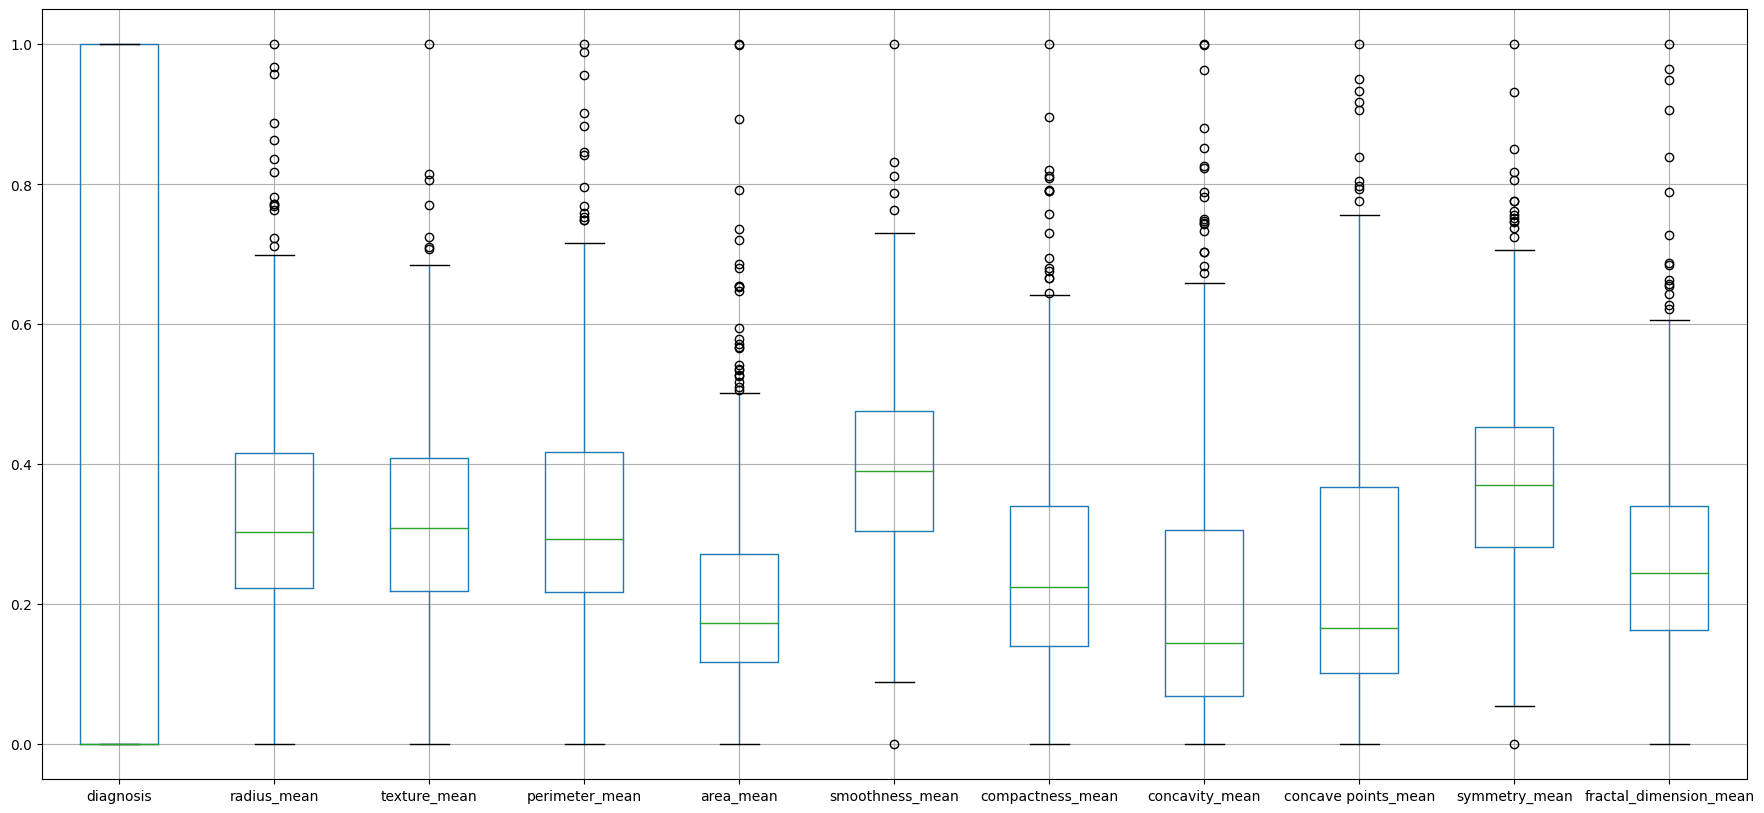

In [118]:
plt.figure(figsize=(22,10))
data1.boxplot()
plt.show()

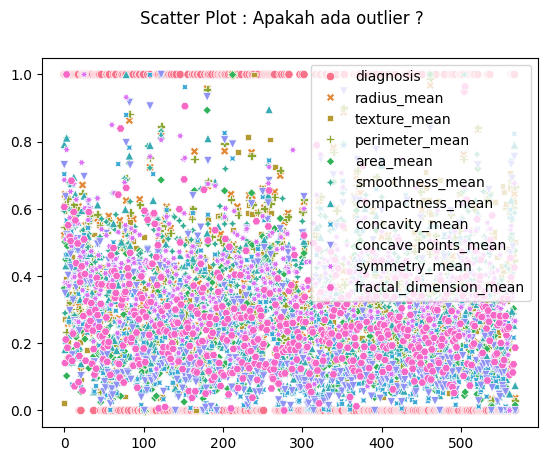

In [119]:
# Membuat pair plot untuk melihat hubungan antar variabel
sns.scatterplot(data1)
plt.suptitle('Scatter Plot : Apakah ada outlier ?')
plt.show()

In [120]:
identify = pd.DataFrame({
    'Data Kosong': data1.isnull().sum(),
    'Data Duplikat': data1.duplicated().sum(),
    'Data NaNN': data1.isna().sum(),
    'Type Data': data1.dtypes})
identify

,Data Kosong,Data Duplikat,Data NaNN,Type Data
diagnosis,0,0,0,int64
radius_mean,0,0,0,float64
texture_mean,0,0,0,float64
perimeter_mean,0,0,0,float64
area_mean,0,0,0,float64
smoothness_mean,0,0,0,float64
compactness_mean,0,0,0,float64
concavity_mean,0,0,0,float64
concave points_mean,0,0,0,float64
symmetry_mean,0,0,0,float64


In [121]:
X = data1.drop(columns='diagnosis')
y = data1['diagnosis']

In [122]:
columns = ['radius_mean','texture_mean','perimeter_mean','area_mean',
            'smoothness_mean','compactness_mean','concavity_mean','concave points_mean',
            'symmetry_mean','fractal_dimension_mean']

enc = LabelEncoder()
X['radius_mean'] = enc.fit_transform(X['radius_mean'])
X['texture_mean'] = enc.fit_transform(X['texture_mean'])
X['perimeter_mean'] = enc.fit_transform(X['perimeter_mean'])
X['area_mean'] = enc.fit_transform(X['area_mean'])
X['smoothness_mean'] = enc.fit_transform(X['smoothness_mean'])
X['compactness_mean'] = enc.fit_transform(X['compactness_mean'])
X['concavity_mean'] = enc.fit_transform(X['concavity_mean'])
X['concave points_mean'] = enc.fit_transform(X['concave points_mean'])
X['symmetry_mean'] = enc.fit_transform(X['symmetry_mean'])
X['fractal_dimension_mean'] = enc.fit_transform(X['fractal_dimension_mean'])

In [123]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,370,1,455,452,444,531,521,526,416,483
1,426,186,486,513,120,215,321,396,219,91
2,406,324,478,487,403,459,478,516,348,184
3,98,297,164,95,471,533,507,493,426,498
4,418,60,493,506,332,414,480,492,216,147
...,...,...,...,...,...,...,...,...,...,...
564,438,370,503,522,410,364,509,522,173,74
565,413,463,483,499,295,312,415,483,187,54
566,340,458,410,421,115,308,329,335,94,82
567,429,467,500,501,442,530,530,531,413,424


Splitting Data

In [124]:
#Dilakukan splitting data dengan training 70% dan testing 30%
X = data1.drop(columns='diagnosis')
Y = data1.diagnosis

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((398, 10), (171, 10), (398,), (171,))

In [125]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
149,0.319892,0.277308,0.306337,0.187275,0.242033,0.136127,0.067502,0.066054,0.208586,0.122999
124,0.302381,0.225905,0.292378,0.173913,0.167193,0.165235,0.189597,0.139165,0.182828,0.174179
421,0.364854,0.144403,0.376132,0.217434,0.455629,0.503711,0.339738,0.313121,0.518182,0.507582
195,0.280610,0.223876,0.267708,0.158176,0.241762,0.105147,0.090745,0.118141,0.388384,0.141323
545,0.314213,0.457220,0.299910,0.182269,0.359574,0.147506,0.069681,0.121421,0.305051,0.169545
...,...,...,...,...,...,...,...,...,...,...
71,0.090255,0.166723,0.103656,0.042630,0.408053,0.410159,0.201640,0.142744,0.425253,0.839090
106,0.220503,0.291512,0.216847,0.114104,0.555836,0.252500,0.165651,0.173211,0.374242,0.320977
270,0.345923,0.240446,0.321401,0.207466,0.105263,0.022606,0.016987,0.031064,0.226263,0.080034
435,0.331251,0.335137,0.327068,0.193425,0.481809,0.288080,0.263824,0.321223,0.307576,0.326032


In [126]:
Y_test

204    0
70     1
131    1
431    0
540    0
      ..
69     0
542    0
176    0
501    1
247    0
Name: diagnosis, Length: 171, dtype: int64

Scalling Data

In [127]:
columns = ['radius_mean','texture_mean','perimeter_mean','area_mean',
            'smoothness_mean','compactness_mean','concavity_mean','concave points_mean',
            'symmetry_mean','fractal_dimension_mean']

scaler = StandardScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

In [128]:
scaler.fit(X)

StandardScaler()

In [129]:
standarized_data = scaler.transform(X)

In [130]:
print(standarized_data)

[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00 ...  2.53247522e+00
   2.21751501e+00  2.25574689e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00 ...  5.48144156e-01
   1.39236330e-03 -8.68652457e-01]
 [ 1.57988811e+00  4.56186952e-01  1.56650313e+00 ...  2.03723076e+00
   9.39684817e-01 -3.98007910e-01]
 ...
 [ 7.02284249e-01  2.04557380e+00  6.72675785e-01 ...  1.05777359e-01
  -8.09117071e-01 -8.95586935e-01]
 [ 1.83834103e+00  2.33645719e+00  1.98252415e+00 ...  2.65886573e+00
   2.13719425e+00  1.04369542e+00]
 [-1.80840125e+00  1.22179204e+00 -1.81438851e+00 ... -1.26181958e+00
  -8.20069901e-01 -5.61032377e-01]]


In [131]:
x = standarized_data
Y = data1['diagnosis']

In [132]:
print(X)
print(Y)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.521037      0.022658        0.545989   0.363733         0.593753   
1       0.643144      0.272574        0.615783   0.501591         0.289880   
2       0.601496      0.390260        0.595743   0.449417         0.514309   
3       0.210090      0.360839        0.233501   0.102906         0.811321   
4       0.629893      0.156578        0.630986   0.489290         0.430351   
..           ...           ...             ...        ...              ...   
564     0.690000      0.428813        0.678668   0.566490         0.526948   
565     0.622320      0.626987        0.604036   0.474019         0.407782   
566     0.455251      0.621238        0.445788   0.303118         0.288165   
567     0.644564      0.663510        0.665538   0.475716         0.588336   
568     0.036869      0.501522        0.028540   0.015907         0.000000   

     compactness_mean  concavity_mean  concave points_mean  sym

In [133]:
import pickle
pickle.dump(scaler, open('scaling_RF.pkl','wb'))

In [134]:
training = pd.DataFrame(X_train)
training

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
149,-0.123490,-0.296801,-0.170507,-0.208616,-1.201680,-0.773170,-0.762312,-0.933241,-1.229949,-0.948166
124,-0.228268,-0.657951,-0.253775,-0.296503,-1.804637,-0.587616,-0.091985,-0.542684,-1.419985,-0.612491
421,0.145534,-1.230564,0.245833,-0.010242,0.519184,1.570006,0.732320,0.386583,1.054201,1.574228
195,-0.358532,-0.672207,-0.400937,-0.400014,-1.203862,-0.970650,-0.634704,-0.654992,0.096572,-0.827986
545,-0.157472,0.967224,-0.208843,-0.241538,-0.254695,-0.700630,-0.750349,-0.637469,-0.518248,-0.642882
...,...,...,...,...,...,...,...,...,...,...
71,-1.497494,-1.073749,-1.379543,-1.160029,0.135881,0.973654,-0.025866,-0.523567,0.368583,3.748516
106,-0.718174,-0.197010,-0.704330,-0.689902,1.326521,-0.031346,-0.223452,-0.360813,-0.007761,0.350328
270,0.032261,-0.555784,-0.080644,-0.075809,-2.303586,-1.496809,-1.039653,-1.120156,-1.099533,-1.229967
435,-0.055526,0.109492,-0.046842,-0.168160,0.730110,0.195463,0.315536,0.429860,-0.499617,0.383481


In [135]:
training.to_excel("Data Training 70% Data1.xlsx")

In [136]:
testing = pd.DataFrame(X_test)
testing

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
204,-0.483132,-0.132858,-0.460297,-0.496272,0.268255,0.048819,-0.103177,-0.271603,0.454285,0.147266
70,1.349062,0.511034,1.292043,1.311971,-0.427073,-0.007883,0.256363,0.824931,-0.823795,-1.112550
131,0.363585,0.076229,0.389285,0.248676,0.962856,0.371436,0.752901,0.861040,0.476642,-0.649789
431,-0.502955,-0.351449,-0.444632,-0.535612,0.686470,0.553274,-0.137137,-0.542949,0.029501,1.154290
540,-0.746493,-1.121269,-0.725765,-0.716687,0.282075,0.170045,-0.266288,-0.597378,0.055584,0.712249
...,...,...,...,...,...,...,...,...,...,...
69,-0.395346,-0.634192,-0.448754,-0.438796,0.170793,-0.996460,-0.663004,-0.525691,-0.793986,-0.847326
542,0.159693,1.487565,0.100732,0.024634,-0.960933,-0.609319,-0.604860,-0.482414,0.137560,-0.810028
176,-1.209780,-0.261162,-1.140044,-0.997089,0.074785,0.510259,0.548369,-0.299481,-0.499617,2.555006
501,-0.100835,1.266598,0.003037,-0.178204,1.471987,1.266942,0.612687,0.508450,1.758449,1.340776


In [137]:
testing.to_excel("Data Testing 30% Data1.xlsx")

Membuat data latih menggunakan algoritma SVM

In [138]:
classifier=svm.SVC(kernel='linear')

In [139]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [152]:
# Defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# Fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.924 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.924 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [153]:
# Print best parameter after tuning
print(grid.best_params_)

# Print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)


Membuat model evaluasi untuk mengukur tingkat akurasi

In [142]:
X_train_prediction = classifier.predict(X_train)
training_dtaa_accuracy = accuracy_score(X_train_prediction, Y_train)

In [143]:
print('Akurasi data training adalah =', training_data_accuracy)

Akurasi data training adalah = 0.9321608040201005


In [144]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy =accuracy_score(X_test_prediction, Y_test)

In [145]:
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.9415204678362573


In [154]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [155]:
print ('accuracy_score: ',accuracy_score(Y_test, grid_predictions))

accuracy_score:  0.9707602339181286


Membuat model prediksi

In [148]:
input_data =(17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if(prediction[0] == 0):
  print('Pasien tidak menunjukkan kanker payudara ganas')
else :
  print('Pasien menunjukkan kanker payudara ganas')

[[ 1.05927189e+02  6.91969587e+01  7.29981336e+02  6.71022244e+03
  -2.17873806e+00  1.05032279e-01  4.93201502e-01 -4.98407470e-01
  -9.95453920e-01 -1.29008477e+00]]
[1]
Pasien menunjukkan kanker payudara ganas


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [149]:
hasil_prediksi = pd.DataFrame(grid_predictions)
hasil_prediksi.rename(columns={0:'Prediksi Data1'},inplace=True)
hasil_prediksi.to_excel('Prediksi_Data1.xlsx', index = None)
hasil_prediksi

,Prediksi Data1
0,0
1,1
2,1
3,0
4,0
...,...
166,0
167,0
168,0
169,1


8. Simpan Model

In [150]:
import pickle

In [151]:
filename = 'BreastCancerBrookly_model.sav'
pickle.dump(classifier, open(filename,'wb'))